## 1. Defining the Question

### a) Specifying the Question

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish:

A prediction result of a game between team 1 and team 2, based on who's home and who's away

### b) Defining the Metric for Success

1. Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
2. the assessment:
Perform your EDA
Perform any necessary feature engineering 
Check of multicollinearity
Start building the model
Cross-validate the model
Compute RMSE
Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
3. Perform appropriate regressions on the data including your justification

### c) Understanding the context 

### d) Recording the Experimental Design

## 2. Reading the Data

In [0]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

In [0]:
# Loading the Datasets
ranking_df = pd.read_csv("/content/fifa_ranking.csv")
results_df = pd.read_csv("/content/results.csv")

## 3. a) Checking the Data for ranking dataset


In [0]:
# Determining the no. of records in our ranking dataset
#
ranking_df.shape

(57793, 16)

In [0]:
# Previewing the top of our dataset
#
ranking_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [0]:
# Previewing the bottom of our dataset
# 
ranking_df.tail()

In [0]:
# Checking whether each column has an appropriate datatype
#
ranking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

## 3. b) Checking the Data for results dataset


In [0]:
# Determining the no. of records in our ranking dataset
#
results_df.shape

(40839, 9)

In [0]:
# Previewing the top of our dataset
#
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [0]:
# Previewing the bottom of our dataset
# 
results_df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [0]:
# Checking whether each column has an appropriate datatype
#
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [0]:
ranking_df.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [0]:
#Renaming columns
ranking_df.rename(columns={'country_full':'country'}, inplace = True)

In [0]:
ranking_df.columns

Index(['rank', 'country', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'rank_date'],
      dtype='object')

In [0]:
# Identifying the Missing Data
#
ranking_df.isnull().values.any()


False

In [0]:
#we will merge the dataframes and come up with one dataset
dataset = pd.merge(results_df, ranking_df, on='country')

dataset.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,30,SCO,0.0,43,-7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,28,SCO,0.0,41,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-09-23
2,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,29,SCO,0.0,43,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-10-22
3,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,25,SCO,0.0,43,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-11-19
4,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,24,SCO,0.0,45,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-12-23


In [0]:
dataset.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank', 'country_abrv',
       'total_points', 'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

## 6. Exploratory Analysis

univariate analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

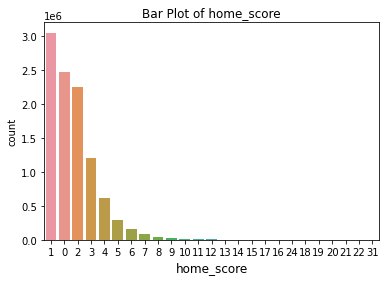

In [109]:
#bar plot 
# For the home_score



sns.countplot(dataset['home_score'], order= dataset['home_score'].value_counts().index)
plt.title('Bar Plot of home_score')
plt.xlabel('home_score', fontsize=12)
plt.xticks(rotation = 0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

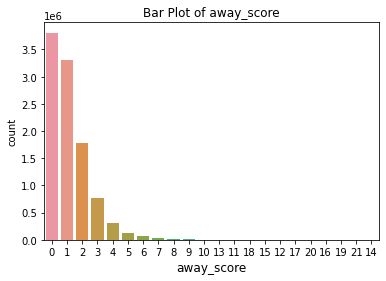

In [110]:
#bar plot 
# For the home_score



sns.countplot(dataset['away_score'], order= dataset['away_score'].value_counts().index)
plt.title('Bar Plot of away_score')
plt.xlabel('away_score', fontsize=12)
plt.xticks(rotation = 0)

bivariate analysis

In [0]:
# Scatter Plots 
sb.pairplot(dataset)

In [0]:
#heatmap


In [0]:
#dropping columns that are un necessary

clean_df = dataset.drop(['date'], axis=1)
clean_df = clean_df.drop(['home_team'], axis=1)
clean_df = clean_df.drop(['away_team'], axis=1)
clean_df = clean_df.drop(['city'], axis=1)
clean_df = clean_df.drop(['country'], axis=1)
clean_df = clean_df.drop(['neutral'], axis=1)
clean_df = clean_df.drop(['country_abrv'], axis=1)
clean_df = clean_df.drop(['confederation'], axis=1)
clean_df = clean_df.drop(['rank_date'], axis=1)
clean_df = clean_df.drop(['tournament'], axis=1)

In [0]:
#Dropping unnecessary columns
#, 'home_team', 'away_team', 'city', 'country', 'neutral', 'country_abrv', 'confederation', 'rank_date']

clean_dataset = dataset.drop(['date'], axis=1)
clean_dataset = clean_dataset.drop(['home_team'], axis=1)

In [0]:

clean_dataset = clean_dataset.drop(['away_team'], axis=1)
clean_dataset = clean_dataset.drop(['city'], axis=1)
clean_dataset = clean_dataset.drop(['country'], axis=1)
clean_dataset = clean_dataset.drop(['neutral'], axis=1)
clean_dataset = clean_dataset.drop(['country_abrv'], axis=1)
clean_dataset = clean_dataset.drop(['confederation'], axis=1)
clean_dataset = clean_dataset.drop(['rank_date'], axis=1)



In [0]:
clean_dataset = clean_dataset.drop(['tournament'], axis=1)


In [0]:
clean_dataset.head()

,home_score,away_score,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
0,0,0,30,0.0,43,-7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,28,0.0,41,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,29,0.0,43,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,25,0.0,43,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,24,0.0,45,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
clean_dataset.tail()

,home_score,away_score,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
10246505,0,2,142,202.71,203,-2,133.61,133.61,50.19,25.09,77.78,23.33,103.40,20.68
10246506,0,2,142,202.71,203,0,133.61,133.61,50.19,25.09,77.78,23.33,103.40,20.68
10246507,0,2,135,226.56,203,7,157.52,157.52,51.07,25.54,81.03,24.31,96.01,19.20
10246508,0,2,135,226.56,227,0,157.52,157.52,51.07,25.54,81.03,24.31,96.01,19.20
10246509,0,2,138,205.52,227,-3,140.01,140.01,47.22,23.61,82.88,24.86,85.14,17.03


In [0]:
#checking for missing values
clean_dataset.isnull().sum()


home_score                 0
away_score                 0
rank                       0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
dtype: int64

In [0]:
#dropping null values
clean_dataset = clean_dataset.dropna()

In [0]:
clean_dataset.isnull().sum()

home_score                 0
away_score                 0
rank                       0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
dtype: int64

In [0]:
# Let's display the correlations between the variables
correlations = clean_dataset.corr()

correlations

,home_score,away_score,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
home_score,1.000000,-0.130479,-0.088759,0.030138,0.064544,0.000125,0.028691,0.028691,0.028720,0.028720,0.029006,0.029006,0.029553,0.029553
away_score,-0.130479,1.000000,0.091895,-0.022237,-0.053129,-0.000605,-0.020484,-0.020484,-0.021673,-0.021673,-0.021846,-0.021846,-0.023392,-0.023392
rank,-0.088759,0.091895,1.000000,-0.280308,-0.625656,-0.057675,-0.281336,-0.281336,-0.260240,-0.260239,-0.251812,-0.251811,-0.245596,-0.245595
total_points,0.030138,-0.022237,-0.280308,1.000000,0.532078,0.017505,0.977566,0.977566,0.941773,0.941774,0.932124,0.932124,0.924363,0.924363
previous_points,0.064544,-0.053129,-0.625656,0.532078,1.000000,-0.023404,0.523436,0.523436,0.501714,0.501714,0.489665,0.489665,0.482963,0.482963
rank_change,0.000125,-0.000605,-0.057675,0.017505,-0.023404,1.000000,0.038898,0.038898,-0.011043,-0.011043,-0.000949,-0.000949,0.001192,0.001192
cur_year_avg,0.028691,-0.020484,-0.281336,0.977566,0.523436,0.038898,1.000000,1.000000,0.865867,0.865868,0.878138,0.878138,0.866877,0.866878
cur_year_avg_weighted,0.028691,-0.020484,-0.281336,0.977566,0.523436,0.038898,1.000000,1.000000,0.865867,0.865868,0.878138,0.878138,0.866877,0.866878
last_year_avg,0.028720,-0.021673,-0.260240,0.941773,0.501714,-0.011043,0.865867,0.865867,1.000000,1.000000,0.863763,0.863763,0.882803,0.882803
last_year_avg_weighted,0.028720,-0.021673,-0.260239,0.941774,0.501714,-0.011043,0.865868,0.865868,1.000000,1.000000,0.863763,0.863763,0.882803,0.882803


In [0]:
clean_dataset.head()

In [0]:
#dataset has 5 milion and we cannot train all that so we will pick a sample

clean_dataset.shape

(10246510, 5)

In [0]:
sample_df = clean_dataset.sample(1000)
sample_df.head()

,home_score,away_score,rank,previous_points,rank_change
559021,3,0,16,909,0
2168967,2,3,12,967,4
1575746,6,0,24,799,3
7601766,1,0,84,513,-1
4797185,1,1,114,322,-1


**Approach 1: Polynomial Approach**

In [0]:
from sklearn import metrics

Model 1: Predict how many goals the home team scores.

In [0]:
#MODEL 1: Predict how many goals the home team scores.
# home score will be our dependent variable

# We will use 4 independent variables for this
X = sample_df[['away_score', 'rank', 'previous_points', 'rank_change']].values
y = sample_df['home_score'].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# assess the accuraccy of the model
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.111949476311195
Mean Squared Error: 2.145941549471912
Root Mean Squared Error: 1.4649032560110964


Running the code above should yield an RMSE of ~ 1.4649. Let's now cross validate our model by using k-fold cross validation. We will use 5 folds.

In [0]:
from sklearn.model_selection import KFold

# We will use the same 4 independent variables for this
X = sample_df[['away_score', 'rank', 'previous_points', 'rank_change']].values
y = sample_df['home_score'].values

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.8586381340523062

Training model 2
Model 2 Root Mean Squared Error: 1.5291926274190977

Training model 3
Model 3 Root Mean Squared Error: 1.6729004731054404

Training model 4
Model 4 Root Mean Squared Error: 1.5226285313573715

Training model 5
Model 5 Root Mean Squared Error: 1.391255525118588


In [0]:
np.mean(RMSES)

the average is fairly close to our initial value. However in this case, it might be worthwile to pick model 5 instead.
the least the RMSE the better the model

lets cross validate using Leave one out method

In [0]:
from sklearn.model_selection import LeaveOneOut

# We will use the same 4 independent variables for this
X = sample_df[['away_score', 'rank', 'previous_points', 'rank_change']].values
y = sample_df['home_score'].values

folds = LeaveOneOut()

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 0 # This will just help 
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 1000 folds
trained 1000 models


1.1621409783639396

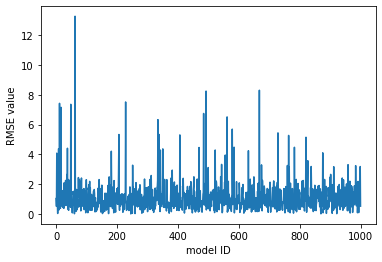

In [0]:
plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

Residual plots and heteroskedasticity testing

In [0]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = sample_df[['away_score', 'rank', 'previous_points', 'rank_change']].values
y = sample_df['home_score'].values

X_train, X_test, home_score_train, home_score_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, home_score_train)

# This is our prediction for home_score based on our model
home_score_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(home_score_predict, home_score_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.021369932937121847

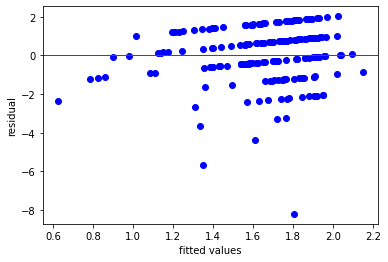

In [0]:
plt.scatter(home_score_predict, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

we will use bartlett's test as it establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.

In [0]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(home_score_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(home_score_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


Model 2: Predict how many goals the away team scores.

In [0]:
# away score will be our dependent variable

# We will use 4 independent variables for this
X = sample_df[['home_score', 'rank', 'previous_points', 'rank_change']].values
y = sample_df['away_score'].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

# assess the accuraccy of the model
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.994281308897732
Mean Squared Error: 1.7494591090622393
Root Mean Squared Error: 1.3226712021746898


Running the code above should yield an RMSE of ~ 1.3227. Let's now cross validate our model by using k-fold cross validation. We will use 5 folds.

In [0]:
from sklearn.model_selection import KFold

# We will use the same 4 independent variables for this
X = sample_df[['home_score', 'rank', 'previous_points', 'rank_change']].values
y = sample_df['away_score'].values

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.5739215783769616

Training model 2
Model 2 Root Mean Squared Error: 1.2877338378175403

Training model 3
Model 3 Root Mean Squared Error: 1.4053180100454248

Training model 4
Model 4 Root Mean Squared Error: 1.4330317849651006

Training model 5
Model 5 Root Mean Squared Error: 1.4552035069876839


In [0]:
np.mean(RMSES)

1.4310417436385423

the average is fairly close to our initial value. However in this case, it might be worthwile to pick model 2 instead.
the least the RMSE the better the model

lets cross validate using Leave one out method

In [0]:
from sklearn.model_selection import LeaveOneOut

# We will use the same 4 independent variables for this
X = sample_df[['home_score', 'rank', 'previous_points', 'rank_change']].values
y = sample_df['away_score'].values

folds = LeaveOneOut()

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 0 # This will just help 
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 1000 folds
trained 1000 models


1.0221885563614086

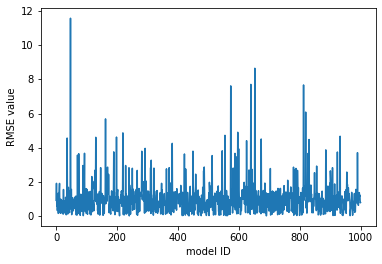

In [0]:
plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

Residual plots and heteroskedasticity testing

In [0]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = sample_df[['home_score', 'rank', 'previous_points', 'rank_change']].values
y = sample_df['away_score'].values

X_train, X_test, away_score_train, away_score_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, away_score_train)

# This is our prediction for away score based on our model
away_score_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(away_score_predict, away_score_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.08809263367272685

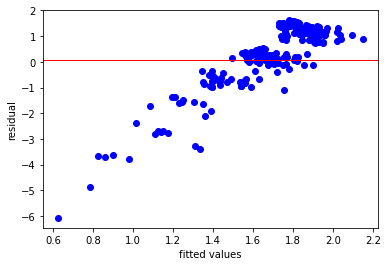

In [0]:
plt.scatter(home_score_predict, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [0]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(away_score_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(away_score_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


**Approach 2: Logistic Approach**

In [0]:
clean_df.head()

,home_score,away_score,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
0,0,0,30,0.0,43,-7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,28,0.0,41,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,29,0.0,43,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,25,0.0,43,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,24,0.0,45,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
sample_dataset = clean_df.sample(1000)
sample_dataset.head()

,home_score,away_score,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
7398157,6,3,89,0.00,343,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2122235,2,2,81,0.00,506,-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
777386,2,0,71,0.00,35,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1450945,2,3,48,0.00,531,-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1424538,2,2,15,997.45,994,-1,308.22,308.22,884.29,442.14,557.87,167.36,398.62,79.72


In [0]:
#creating a boolean column named result for win as 1, lose as -1 and draw as 0
#result column will be our dependent variable
sample_dataset.loc[sample_dataset['home_score'] == sample_dataset['away_score'], 'result'] = 0
sample_dataset.loc[sample_dataset['home_score'] > sample_dataset['away_score'], 'result'] = 1
sample_dataset.loc[sample_dataset['home_score'] < sample_dataset['away_score'], 'result'] = -1  

In [0]:
sample_dataset.head()

,home_score,away_score,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,result
7398157,6,3,89,0.00,343,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
2122235,2,2,81,0.00,506,-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
777386,2,0,71,0.00,35,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
1450945,2,3,48,0.00,531,-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.0
1424538,2,2,15,997.45,994,-1,308.22,308.22,884.29,442.14,557.87,167.36,398.62,79.72,0.0


In [0]:
#We will drop homw and away score since we have obtained result

sample_dataset = sample_dataset.drop(['away_score'], axis=1)

In [0]:
sample_dataset = sample_dataset.drop(['home_score'], axis=1)

In [0]:
sample_dataset

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,result
7398157,89,0.00,343,4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
2122235,81,0.00,506,-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
777386,71,0.00,35,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
1450945,48,0.00,531,-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.0
1424538,15,997.45,994,-1,308.22,308.22,884.29,442.14,557.87,167.36,398.62,79.72,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6560992,120,277.38,246,9,150.85,150.85,197.69,98.84,64.50,19.35,41.70,8.34,1.0
102100,34,734.82,735,0,466.54,466.54,213.42,106.71,287.76,86.33,376.21,75.24,0.0
8557182,156,137.17,137,-5,0.00,0.00,79.38,39.69,202.34,60.70,183.89,36.78,0.0
3970327,28,0.00,809,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0


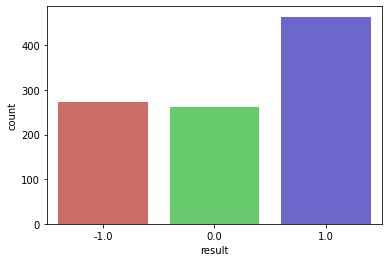

In [0]:
# Checking that our target variable is binary 
# To make sure that it's a binary variable, let's use Seaborn's countplot() function.
# 
sb.countplot(x='result',data=sample_dataset, palette='hls')

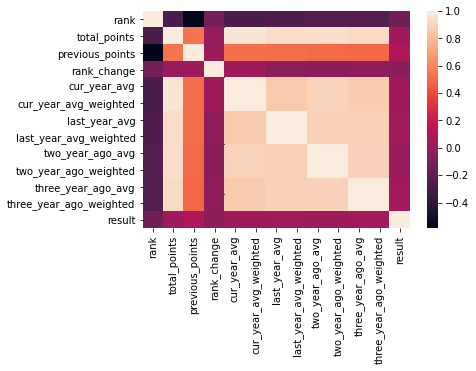

In [0]:
sb.heatmap(sample_dataset.corr())

In [0]:
# Splitting our dataset
#
X = sample_dataset.drop("result",axis=1)
y = sample_dataset["result"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [0]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [0]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

# The results from the confusion matrix tell us that 11, 14, and 115 are the number of correct predictions. 
# 34 and 27 are the number of incorrect predictions.

array([[ 11,  10,  62],
       [  7,  14,  53],
       [ 12,  16, 115]])

In [0]:
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

hyper parameter tuning


In [0]:
X = sample_dataset.drop("result",axis=1)
y = sample_dataset["result"]

In [0]:
# Creating the logistic regression
logistic = linear_model.LogisticRegression()

In [0]:
# Creating regularization penalty space
penalty = ['l1', 'l2']

# Creating regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Creating hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [0]:
# Creating grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [0]:
# Fitting grid search
best_model = clf.fit(X, y)

In [0]:
# Viewing best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 7.742636826811269


## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [0]:
# Reviewing the Solution 
#

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?